In [1]:
!unzip twitter_emotions.zip

Archive:  twitter_emotions.zip
  inflating: test.csv                
  inflating: training.csv            
  inflating: validation.csv          


In [2]:
%%capture
!pip install -U datasets
!pip install -U accelerate

In [3]:
import pandas as pd
import numpy as np
import panel as pn
import warnings; warnings.filterwarnings('ignore')

In [4]:
def show_panel(df):
    return pn.widgets.Tabulator(df.head(20),
                                show_index=False,
                                pagination='local',
                                page_size=10)


pn.extension('tabulator')
pn.widgets.Tabulator.theme = 'bootstrap'

validation = pd.read_csv('/content/validation.csv')
train = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/test.csv')

print('Dataset information:')
print(f'Training data: {train.shape}')
print(f'Validation data: {validation.shape}')
print(f'Test data: {test.shape}')

Dataset information:
Training data: (16000, 2)
Validation data: (2000, 2)
Test data: (2000, 2)


In [5]:
show_panel(train)

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [6]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

# Don't forget the class label data
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
ft = Features({'text': Value(dtype='string'), 'label': ClassLabel(names=class_names)})

# Combine Multiple Datasets
emotions = DatasetDict({
    "train": Dataset.from_pandas(train,features=ft),
    "test": Dataset.from_pandas(test,features=ft),
    "validation": Dataset.from_pandas(validation,features=ft)
    })

# Convert a single DataFrame to a Dataset
# emotions = Dataset.from_pandas(train,features=ft)

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
emotions["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [8]:
# Training Data
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
# Convert Dataset to DataFrame (don't forget to reset)
emotions.set_format(type="pandas")
df = emotions["train"][:]
show_panel(df)

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [10]:
# Add label data to dataframe
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
show_panel(df)

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [12]:
from transformers import AutoTokenizer

text = 'Tokenisation of text is a core task of NLP.'

# Load parameters of the tokeniser
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Show tokeniser information
tokenizer

# Or we can load the Tokeniser manually `transformers.DistilBertTokenizer`

# from transformers import DistilBertTokenizer

# model_ckpt = "distilbert-base-uncased"
# distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
# distilbert_tokenizer

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [13]:
print('')
print(f'Vocab size: {tokenizer.vocab_size}')
print(f'Max length: {tokenizer.model_max_length}')
print(f'Tokeniser model input names: {tokenizer.model_input_names}')


Vocab size: 30522
Max length: 512
Tokeniser model input names: ['input_ids', 'attention_mask']


In [14]:
print('Encoded text')
encoded_text = tokenizer(text)
print(encoded_text,'\n')

print('Tokens')
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens,'\n')

print('Convert tokens to string')
print(tokenizer.convert_tokens_to_string(tokens),'\n')

Encoded text
{'input_ids': [101, 19204, 6648, 1997, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]} 

Tokens
['[CLS]', 'token', '##isation', 'of', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]'] 

Convert tokens to string
[CLS] tokenisation of text is a core task of nlp. [SEP] 



In [15]:
# Tokenisation function
def tokenise(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [16]:
emotions["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [17]:
# apply to the entire dataset (train,test and validation dataset)
#emotions_encoded = emotion_datasets.map(tokenise, batched=True, batch_size=None)

In [18]:
train_dataset=Dataset.from_pandas(train)
valid_dataset=Dataset.from_pandas(test)
test_dataset=Dataset.from_pandas(validation)

In [19]:
train_dataset=train_dataset.map(tokenise,batched=True, batch_size=None)
valid_dataset=valid_dataset.map(tokenise,batched=True, batch_size=None)
test_dataset=test_dataset.map(tokenise,batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [20]:
import warnings; warnings.filterwarnings('ignore')
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [21]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [22]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [23]:
inputs = {k:v.to(device) for k,v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [24]:
print(outputs.last_hidden_state.size())
print(outputs.last_hidden_state[:,0].size())

torch.Size([1, 6, 768])
torch.Size([1, 768])


In [25]:
def extract_hidden_states(batch):

    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [26]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [27]:
train_dataset.set_format("torch",columns=["input_ids","attention_mask","label"])
test_dataset.set_format("torch",columns=["input_ids","attention_mask","label"])
valid_dataset.set_format("torch",columns=["input_ids","attention_mask","label"])

In [28]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [29]:
train_dataset=train_dataset.map(extract_hidden_states,batched=True)
test_dataset=test_dataset.map(extract_hidden_states,batched=True)
valid_dataset=valid_dataset.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [30]:
from transformers import AutoModelForSequenceClassification

num_labels = 6

model_ckpt = "distilbert-base-uncased"
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt,
                          num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [32]:
from transformers import Trainer, TrainingArguments

bs = 64 # batch size
logging_steps = len(train_dataset) // bs
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,             # number of training epochs
                                  learning_rate=2e-5,             # model learning rate
                                  per_device_train_batch_size=bs, # batch size
                                  per_device_eval_batch_size=bs,  # batch size
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [33]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=train_dataset,
                  eval_dataset=valid_dataset,
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.799000,0.273517,0.910500,0.910490
2,0.210900,0.192615,0.922500,0.923327
3,0.147800,0.178970,0.924000,0.923723


TrainOutput(global_step=750, training_loss=0.3858980509440104, metrics={'train_runtime': 356.3054, 'train_samples_per_second': 134.716, 'train_steps_per_second': 2.105, 'total_flos': 1080514292544000.0, 'train_loss': 0.3858980509440104, 'epoch': 3.0})

In [34]:
pred_output = trainer.predict(valid_dataset)
pred_output

PredictionOutput(predictions=array([[ 5.0571113 , -1.0094773 , -1.6262006 , -0.37536937, -1.2399215 ,
        -1.9685943 ],
       [ 5.244906  , -0.9844614 , -1.5017942 , -0.82518804, -1.1170993 ,
        -1.8532695 ],
       [ 5.226316  , -1.1303515 , -1.4752121 , -1.0909684 , -0.7563648 ,
        -1.756204  ],
       ...,
       [-1.2962189 ,  4.9771547 , -0.6650381 , -1.7035087 , -1.9257337 ,
        -1.2318782 ],
       [-1.1465592 ,  4.834561  , -0.79363924, -1.9776152 , -1.507407  ,
        -1.3583441 ],
       [-1.214614  , -1.5874963 , -1.6981802 , -1.6099087 ,  2.7560053 ,
         2.5711288 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 4]), metrics={'test_loss': 0.17897015810012817, 'test_accuracy': 0.924, 'test_f1': 0.923723479903152, 'test_runtime': 3.6575, 'test_samples_per_second': 546.827, 'test_steps_per_second': 8.749})

In [35]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (2000, 6)
[[ 5.0571113  -1.0094773  -1.6262006  -0.37536937 -1.2399215  -1.9685943 ]
 [ 5.244906   -0.9844614  -1.5017942  -0.82518804 -1.1170993  -1.8532695 ]
 [ 5.226316   -1.1303515  -1.4752121  -1.0909684  -0.7563648  -1.756204  ]
 ...
 [-1.2962189   4.9771547  -0.6650381  -1.7035087  -1.9257337  -1.2318782 ]
 [-1.1465592   4.834561   -0.79363924 -1.9776152  -1.507407   -1.3583441 ]
 [-1.214614   -1.5874963  -1.6981802  -1.6099087   2.7560053   2.5711288 ]]


In [36]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2000,)
Predictions: [0 0 0 ... 1 1 4]


In [37]:
pred_output.metrics

{'test_loss': 0.17897015810012817,
 'test_accuracy': 0.924,
 'test_f1': 0.923723479903152,
 'test_runtime': 3.6575,
 'test_samples_per_second': 546.827,
 'test_steps_per_second': 8.749}

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

In [39]:
X_train = np.array(train_dataset["hidden_state"])
X_valid = np.array(valid_dataset["hidden_state"])
y_train = np.array(train_dataset["label"])
y_valid = np.array(valid_dataset["label"])
print(f'Training Dataset: {X_train.shape}')
print(f'Validation Dataset {X_valid.shape}')

Training Dataset: (16000, 768)
Validation Dataset (2000, 768)


In [40]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Scale the data
X_scaled = MinMaxScaler().fit_transform(X_train)

# lower dimension transformation
tsne_model = TSNE(n_components=2).fit(X_scaled)

# Create a df of 2D embeddings
df_embedding = pd.DataFrame(tsne_model.embedding_, columns=["X", "Y"])
df_embedding["label"] = y_train

In [41]:
emotions["train"].features["label"]

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

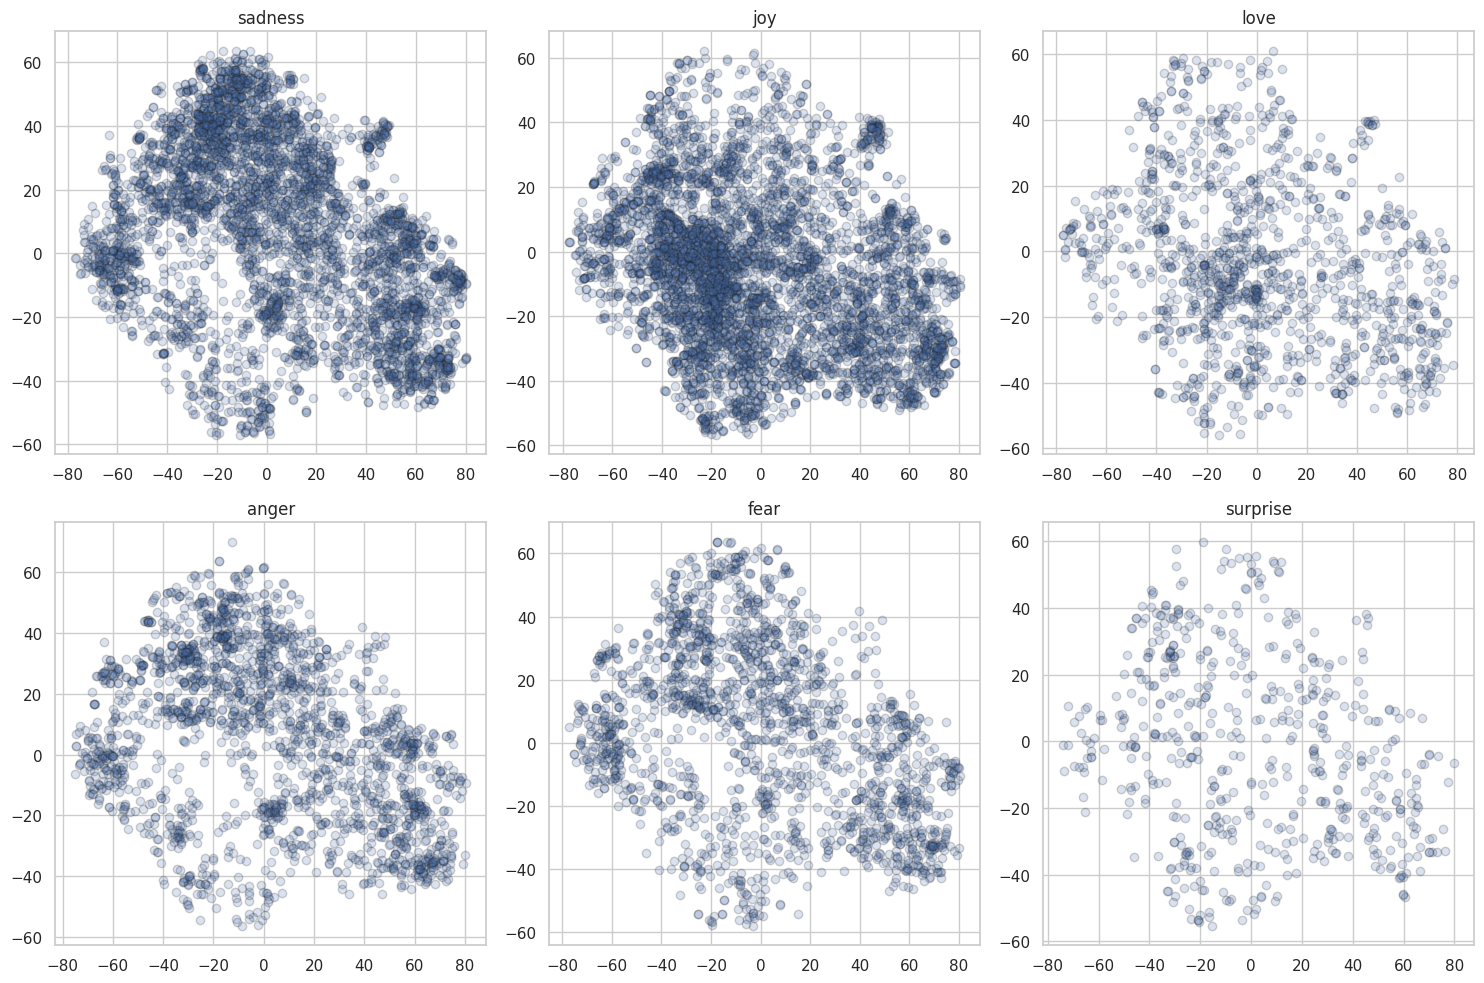

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
labels = emotions["train"].features["label"].names

for i, label in enumerate(labels):

    dict_embedding_sub = dict(tuple(df_embedding.groupby('label')))
    df_embedding_sub = dict_embedding_sub[i]

    axes[i].scatter(df_embedding_sub["X"],
                    df_embedding_sub["Y"],
                    lw=1,ec='k',alpha=0.2)

    axes[i].set_title(f'{label}')

plt.tight_layout()
plt.show()

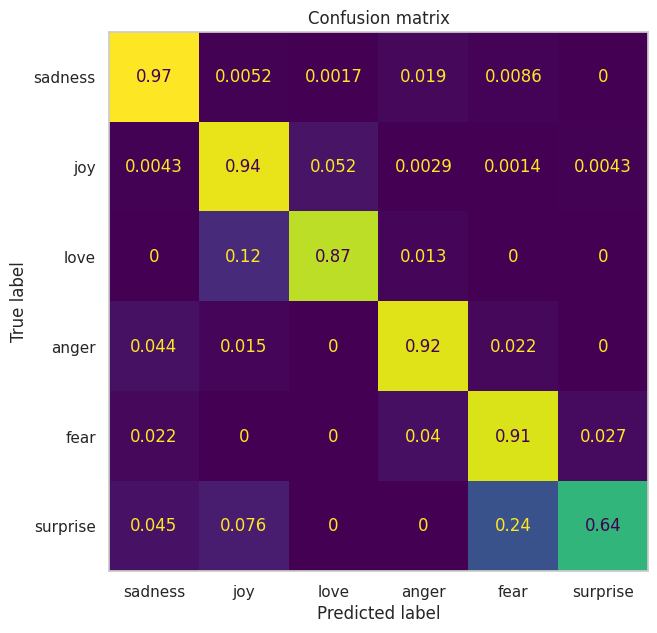

In [43]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [44]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):

    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

# Convert our dataset back to PyTorch tensors
valid_dataset.set_format("torch",columns=["input_ids", "attention_mask", "label"])
# Compute loss values
valid_dataset = valid_dataset.map(forward_pass_with_label,
                                  batched=True,
                                  batch_size=16)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [45]:
train_dataset.set_format("pandas")
valid_dataset.set_format("pandas")
test_dataset.set_format("pandas")

cols = ["text", "label", "predicted_label", "loss"]
df_test = valid_dataset[:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [46]:
show_panel(df_test.sort_values("loss", ascending=False))

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [47]:
show_panel(df_test.sort_values("loss", ascending=True))

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [48]:
trainer.save_model()

In [49]:
from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-emotion")

# New unseen by model data
new_data = 'I watched a movie last night, it was quite brilliant'

In [50]:
preds = classifier(new_data, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.0028114032465964556},
  {'label': 'LABEL_1', 'score': 0.9837340116500854},
  {'label': 'LABEL_2', 'score': 0.003668874269351363},
  {'label': 'LABEL_3', 'score': 0.003224578220397234},
  {'label': 'LABEL_4', 'score': 0.0020130977500230074},
  {'label': 'LABEL_5', 'score': 0.004547941964119673}]]

In [54]:
import plotly.express as px

df_preds = pd.DataFrame(preds[0])
df_preds

,label,score
0,LABEL_0,0.002811
1,LABEL_1,0.983734
2,LABEL_2,0.003669
3,LABEL_3,0.003225
4,LABEL_4,0.002013
5,LABEL_5,0.004548


In [56]:
px.bar(x=labels,y=100*df_preds['score'],template='plotly_white')

In [57]:
import shutil

# Define the path of the folder you want to zip
folder_path = '/content/distilbert-base-uncased-finetuned-emotion'

# Define the path for the zip file
zip_file_path = '/content/gip_folder.zip'

# Create a zip file from the folder
shutil.make_archive(zip_file_path, 'zip', folder_path)

# Print a message indicating the zip file creation
print(f"Folder '{folder_path}' zipped to '{zip_file_path}'.")

Folder '/content/distilbert-base-uncased-finetuned-emotion' zipped to '/content/gip_folder.zip'.


In [59]:
trained_model_ckpt = "/content/distilbert-base-uncased-finetuned-emotion"
distil_bert_model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt))

In [60]:
distil_bert_model.push_to_hub(repo_id ="kajol/twitter_emotion", token="huggingface writting token")
tokenizer.push_to_hub(repo_id="kajol/twitter_emotion", token="huggingface writting token")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kajol/twitter_emotion/commit/d1f032af1ef79646d8f3cf1a5dd438b5ecdd73a8', commit_message='Upload tokenizer', commit_description='', oid='d1f032af1ef79646d8f3cf1a5dd438b5ecdd73a8', pr_url=None, pr_revision=None, pr_num=None)

In [61]:
# load from previously saved model
distil_classifier = pipeline("text-classification", model="kajol/twitter_emotion")

# New unseen by model data
new_data = 'I watched a movie last night, it was quite brilliant'

config.json:   0%|          | 0.00/566 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [62]:
preds = classifier(new_data, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.0028114032465964556},
  {'label': 'LABEL_1', 'score': 0.9837340116500854},
  {'label': 'LABEL_2', 'score': 0.003668874269351363},
  {'label': 'LABEL_3', 'score': 0.003224578220397234},
  {'label': 'LABEL_4', 'score': 0.0020130977500230074},
  {'label': 'LABEL_5', 'score': 0.004547941964119673}]]